In [52]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# IPL Analysis using Pyspark

## EDA

In [15]:
spark = SparkSession.builder.getOrCreate()

In [21]:
df = spark.read.csv('data/Ipl-clean-data2008-2023.csv',header=True,inferSchema=True)

In [40]:
df.show(2)

+---+------+-------+--------------------+----------+--------------------+---------+---------+--------+----------+----------------+----------------+------+--------------------+-----------------+-----------------+--------+--------------------+--------------+-------------+-------------+--------------------+----------+----------+---------+------------+---------------+----------+---------+------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+------------+---------------+--------------+
| sn|season|     id|                name|short_name|         description|home_team|away_team|toss_won|  decision|1st_inning_score|2nd_inning_score|winner|              result|       start_date|         end_date|venue_id|          venue_name|  home_captain| away_captain|          pom|              points|super_over|home_overs|home_ru

In [37]:
#highest tosses won
df.groupBy('toss_won').agg(F.count('toss_won').alias('count')).orderBy('count',ascending=False).show()

+--------+-----+
|toss_won|count|
+--------+-----+
|      MI|  116|
|      DC|  110|
|     KKR|  105|
|     RCB|  101|
|     SRH|  100|
|      RR|   98|
|     CSK|   97|
|    KXIP|   89|
|     PWI|   20|
|      GT|   17|
|      GL|   15|
|     RPS|   10|
|   Kochi|    8|
|     LSG|    8|
|    PBKS|    5|
+--------+-----+



In [38]:
#highest wins
df.groupBy('winner').agg(F.count('toss_won').alias('count')).orderBy('count',ascending=False).show()

+------+-----+
|winner|count|
+------+-----+
|    MI|  125|
|   CSK|  110|
|   KKR|  105|
|   RCB|  102|
|   SRH|   93|
|    DC|   92|
|    RR|   92|
|  KXIP|   82|
|    GT|   20|
|  PBKS|   19|
|   LSG|   16|
|   RPS|   14|
|   PWI|   12|
|    GL|   11|
| Kochi|    6|
+------+-----+



In [39]:
#highest wins
df.groupBy('decision').agg(F.count('toss_won').alias('count')).orderBy('count',ascending=False).show()

+----------+-----+
|  decision|count|
+----------+-----+
|BOWL FIRST|  576|
| BAT FIRST|  323|
+----------+-----+



In [45]:
home_runs_list = [row['home_runs'] for row in df.select('home_runs').collect()]
away_runs_list = [row['away_runs'] for row in df.select('away_runs').collect()]
home_runs_list.extend(away_runs_list)

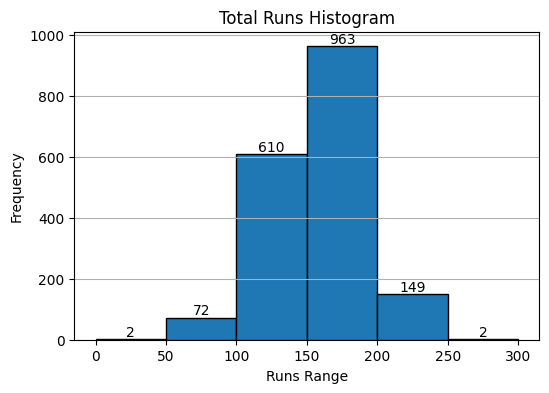

In [61]:
plt.figure(figsize=(6, 4))
n, bins, patches = plt.hist(home_runs_list, bins=[0, 50, 100, 150, 200, 250, 300], edgecolor='black')
plt.title('Total Runs Histogram')
plt.xlabel('Runs Range')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.bar_label(patches)
plt.show()

In [63]:
df.createOrReplaceTempView("matches")

query = """
SELECT umpire, COUNT(*) as count
FROM (
    SELECT umpire1 AS umpire FROM matches
    UNION ALL
    SELECT umpire2 FROM matches
) AS combined_umpires
GROUP BY umpire
ORDER BY count DESC
"""

result = spark.sql(query)
result.show()

+--------------------+-----+
|              umpire|count|
+--------------------+-----+
|       Sundaram Ravi|  117|
|      Anil Chaudhary|  109|
|Chettithody Shams...|   80|
|    Kumar Dharmasena|   78|
|         Nitin Menon|   78|
|      Chris Gaffaney|   65|
|KN Ananthapadmana...|   62|
|      Marais Erasmus|   60|
|      Bruce Oxenford|   55|
|          Rod Tucker|   54|
|              Nandan|   52|
|     Virender Sharma|   50|
|     Vineet Kulkarni|   48|
|           Asad Rauf|   42|
|        Simon Taufel|   38|
|           Aleem Dar|   36|
| Richard Illingworth|   35|
|       Rudi Koertzen|   33|
|      Yeshwant Barde|   33|
|      Billy Doctrove|   33|
+--------------------+-----+
only showing top 20 rows



In [64]:
df.columns

['sn',
 'season',
 'id',
 'name',
 'short_name',
 'description',
 'home_team',
 'away_team',
 'toss_won',
 'decision',
 '1st_inning_score',
 '2nd_inning_score',
 'winner',
 'result',
 'start_date',
 'end_date',
 'venue_id',
 'venue_name',
 'home_captain',
 'away_captain',
 'pom',
 'points',
 'super_over',
 'home_overs',
 'home_runs',
 'home_wickets',
 'home_boundaries',
 'away_overs',
 'away_runs',
 'away_wickets',
 'away_boundaries',
 'highlights',
 'home_key_batsman',
 'home_key_bowler',
 'home_playx1',
 'away_playx1',
 'away_key_batsman',
 'away_key_bowler',
 'match_days',
 'umpire1',
 'umpire2',
 'tv_umpire',
 'referee',
 'reserve_umpire']

In [65]:
query = """
SELECT captain, COUNT(*) as count
FROM (
    SELECT home_captain as captain FROM matches
    UNION ALL
    SELECT away_captain as captain FROM matches
) AS combined_captain
GROUP BY captain
ORDER BY count DESC
"""

result = spark.sql(query)
result.show()

+------------------+-----+
|           captain|count|
+------------------+-----+
|          MS Dhoni|  186|
|      Rohit Sharma|  139|
|       Virat Kohli|  127|
|    Gautam Gambhir|  115|
|      David Warner|   71|
|    Adam Gilchrist|   57|
|      Shreyas Iyer|   49|
|       Shane Warne|   48|
|          KL Rahul|   48|
|  Sachin Tendulkar|   44|
|      Rahul Dravid|   42|
|  Kumar Sangakkara|   42|
|      Sanju Samson|   41|
|    Dinesh Karthik|   40|
|   Kane Williamson|   39|
|      Yuvraj Singh|   39|
|      Steven Smith|   38|
|    Sourav Ganguly|   38|
|   Virender Sehwag|   36|
|Mahela Jayawardene|   30|
+------------------+-----+
only showing top 20 rows



## Win prediction model

In [193]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### Feature Enginnering

In [194]:
features_df = df.select('venue_name', 'home_team', 'away_team', 'winner')
unique_teams_list = (features_df.select("home_team")
                     .union(features_df.select("away_team"))
                     .union(features_df.select("winner"))
                     .distinct()
                     .rdd.flatMap(lambda x: x)
                     .collect())

team_index = {team: idx for idx, team in enumerate(unique_teams_list)}

map_to_index = udf(lambda team: team_index[team] if team in team_index else None, IntegerType())

indexed_df = (features_df
              .withColumn("home_team_index", map_to_index("home_team"))
              .withColumn("away_team_index", map_to_index("away_team"))
              .withColumn("winner_index", map_to_index("winner")))

In [195]:
indexer = StringIndexer(inputCols=['venue_name'], 
                        outputCols=['venue_index'])
indexed = indexer.fit(indexed_df).transform(indexed_df)


In [196]:
indexed.show(2)

+--------------------+---------+---------+------+---------------+---------------+------------+-----------+
|          venue_name|home_team|away_team|winner|home_team_index|away_team_index|winner_index|venue_index|
+--------------------+---------+---------+------+---------------+---------------+------------+-----------+
|M.Chinnaswamy Sta...|      RCB|       GT|    GT|             10|              7|           7|        1.0|
|Wankhede Stadium,...|       MI|      SRH|    MI|              6|              9|           6|        0.0|
+--------------------+---------+---------+------+---------------+---------------+------------+-----------+
only showing top 2 rows



In [197]:
encoder = OneHotEncoder(inputCols=['venue_index', 'home_team_index', 'away_team_index'],
                        outputCols=['venue_vec', 'home_team_vec', 'away_team_vec'])

label_indexer = StringIndexer(inputCol='winner', outputCol='label')

pipeline = Pipeline(stages=[encoder, label_indexer])

In [198]:
prepared_df = pipeline.fit(indexed).transform(indexed)

In [199]:
prepared_df.show(5)

+--------------------+---------+---------+------+---------------+---------------+------------+-----------+---------------+---------------+--------------+-----+
|          venue_name|home_team|away_team|winner|home_team_index|away_team_index|winner_index|venue_index|      venue_vec|  home_team_vec| away_team_vec|label|
+--------------------+---------+---------+------+---------------+---------------+------------+-----------+---------------+---------------+--------------+-----+
|M.Chinnaswamy Sta...|      RCB|       GT|    GT|             10|              7|           7|        1.0| (36,[1],[1.0])|(14,[10],[1.0])|(14,[7],[1.0])|  8.0|
|Wankhede Stadium,...|       MI|      SRH|    MI|              6|              9|           6|        0.0| (36,[0],[1.0])| (14,[6],[1.0])|(14,[9],[1.0])|  0.0|
|Eden Gardens, Kol...|      KKR|      LSG|   LSG|              0|              5|           5|        2.0| (36,[2],[1.0])| (14,[0],[1.0])|(14,[5],[1.0])| 10.0|
|Arun Jaitley Stad...|       DC|      CS

### Model Building

In [200]:
train_data, test_data = prepared_df.randomSplit([0.8, 0.2], seed=42)

In [201]:
assembler = VectorAssembler(inputCols=['venue_vec', 'home_team_vec', 'away_team_vec'], outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

In [202]:
lr = RandomForestClassifier(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)

### Testing

In [203]:
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5205479452054794


In [206]:
predictions.show()

+--------------------+---------+---------+------+---------------+---------------+------------+-----------+---------------+--------------+---------------+-----+--------------------+--------------------+--------------------+----------+
|          venue_name|home_team|away_team|winner|home_team_index|away_team_index|winner_index|venue_index|      venue_vec| home_team_vec|  away_team_vec|label|            features|       rawPrediction|         probability|prediction|
+--------------------+---------+---------+------+---------------+---------------+------------+-----------+---------------+--------------+---------------+-----+--------------------+--------------------+--------------------+----------+
|Arun Jaitley Stad...|       DC|      CSK|   CSK|              2|              8|           8|        3.0| (36,[3],[1.0])|(14,[2],[1.0])| (14,[8],[1.0])|  1.0|(64,[3,38,58],[1....|[1.47605620869806...|[0.07380281043490...|       5.0|
|Arun Jaitley Stad...|       DC|      CSK|    DC|              2

In [204]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize the evaluator with the respective metric
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Compute the metrics
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 0.4650713933631585
Recall: 0.5205479452054794
F1 Score: 0.47791133196048585


In [205]:
df.show(2)

+---+------+-------+--------------------+----------+--------------------+---------+---------+--------+----------+----------------+----------------+------+--------------------+-----------------+-----------------+--------+--------------------+--------------+-------------+-------------+--------------------+----------+----------+---------+------------+---------------+----------+---------+------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+------------+---------------+--------------+
| sn|season|     id|                name|short_name|         description|home_team|away_team|toss_won|  decision|1st_inning_score|2nd_inning_score|winner|              result|       start_date|         end_date|venue_id|          venue_name|  home_captain| away_captain|          pom|              points|super_over|home_overs|home_ru